<a href="https://colab.research.google.com/github/SarahGemaque/ocean-backend-nuvem-04-02-2021/blob/main/Ocean_DeepLearning_09_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras # Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neura
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [3]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 representa:", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242

a imagem representa: 7


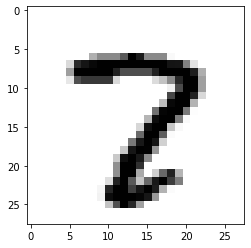

In [21]:
import matplotlib.pyplot as plt

indice = 12000

print("a imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [ ]:
# Fluxo para construção de rede neural
# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões


In [25]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) #6000
quantidade_teste = len(x_teste) #10000

resolucao_imagem = x_treino[0].shape # (28,28)

resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [26]:
print("Quantidade de itens em x_treino_achatado[0]", len(x_treino[0]))

#Como ficou x_treino_achatado[0]
print(x_treino[0])

Quantidade de itens em x_treino_achatado[0] 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 25

In [28]:
# Normalização dos dados

# 255 vire 1
#127 vire 0.5
# 0 vire 0
# E assim por diante

x_treino = x_treino.astype('float32') # Converte toda a base de x_treino de uint_8 para float32
x_teste = x_teste.astype('float32') # Converte toda a base de x_teste de uint_8 para float32

x_treino /= 255 # x_treino = x_treino/255, divide os 60000 valores
x_teste /= 255 # x_teste = x_teste/255, divide os 10000 valores

In [29]:
# Acessamos a primeria imagem, disponível em x_treino[0], e depos exibimos qual o valor está no pixel 350 da imagem
# Lembando que cada linha possui 28 pixels (0-27), portanto ao acessar o índice 28, estamos acessando o primeiro pixel da segunda linha.

print(x_treino[0][350], type(x_treino[0][350]))
print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [34]:
# Preparação da camada de saída (output)

# Quais são as possibilidades de saída? Números de 0 a 9
# Quantos itens temos? 10 itens
# Números -> [0,1,2,3,4,5,6,7,8,9]
# Número 0 -> [1,0,0,0,0,0,0,0,0,0]
# Número 1 -> [0,1,0,0,0,0,0,0,0,0]
# Número 9 -> [0,0,0,0,0,0,0,0,0,1]

valores_unicos = set(y_treino) # {0,1,2,3,4,5,6,7,8,9}
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10
print(quantidade_valores_unicos)

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [36]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting
# No caso, será o Dropout
model.add(Dropout(0.2))

# Segunda hidden layer
# 20 neurônios
# Função de ativação: ReLU

model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos que, no caso, é 10
# Função de ativação: Como ReLU  deve ser usada apenas nas hidden layers, iremos utilizar a função Softmax
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compila e treina o modelo
# Precisamos informar qual será:
# Função de erro
# Algoritmo de backpropagation
# Dados para Treino (imagens normalizadas e labels categorizadas)
# Dados para Teste (imagens normalizadas e labels categorizadas)
# Quantidade de épocas que queremos rodar (sendo 1 época equivalente a analisar TODAS as imagens de treino)
# Tamanho de cada 'batch'
#   -> Supondo que temos 100 imagens
#   -> 100 imagens pode ser muito pesado para processar de uma única vez
#   -> Portanto, quebramos em 'batches' de 10 imagens, cada, e processamos 10 imagens por vez
#   -> Geralmente, o tamanho dos batches deve ser potência de 2 (2, 4, 8, 16, 32, 64, 128, ...), para melhorar performance

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.1870 - accuracy: 0.6122 - val_loss: 0.2979 - val_accuracy: 0.9158
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4889 - accuracy: 0.8524 - val_loss: 0.2315 - val_accuracy: 0.9323
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3960 - accuracy: 0.8825 - val_loss: 0.2077 - val_accuracy: 0.9384
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3557 - accuracy: 0.8962 - val_loss: 0.1964 - val_accuracy: 0.9432
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3313 - accuracy: 0.9039 - val_loss: 0.1821 - val_accuracy: 0.9458
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3079 - accuracy: 0.9102 - val_loss: 0.1778 - val_accuracy: 0.9482
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2994 - accuracy: 0.9134 - val_loss: 0.1689 - val_accuracy: 0.9501
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Previsão: [[0.00351723 0.00361175 0.0095517  0.03162069 0.00149949 0.0434482
  0.00162122 0.00426636 0.8797923  0.02107111]]
Previsão ajustada: [8]


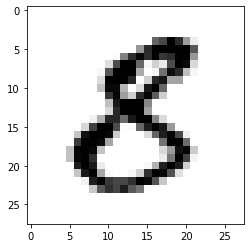

In [42]:
#Fazend nossas previsões

indice = 1234

print("Valor categórico em y_teste[indice]:", y_teste[indice])

imagem = x_teste[indice].reshape(1,resolucao_total)

# Fazemos a previsão da imagem
prediction = model.predict(imagem)
print("Previsão:", prediction)

# Transformar a previsão em algo que conseguimos entender de forma mais fácil

import numpy as np
# Convertemos a previsão que está em %, pegando o maior valor disponível
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada:", prediction_class)

# Recarregamos o MNIST e exibimos a imagem original usando o matplotlib carregado anteriormente
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)